In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
hotels = pd.read_csv('../data/features_hotels.csv')
test_set = pd.read_csv('../data/test_set.csv')
data = pd.read_csv('../data/data.csv')
test_set = test_set.merge(hotels, on=['hotel_id','city'])
data = data.merge(hotels, on=['hotel_id','city'])
N = len(test_set)

In [3]:
data.head()

,city,date,langage,mobile,request_number,avatar_id,hotel_id,price,stock,group,brand,parking,pool,children_policy
0,valletta,2,bulgarian,1,1,134,55,109,10,Boss Western,Boss Western,1,0,0
1,valletta,32,bulgarian,1,1,167,55,100,49,Boss Western,Boss Western,1,0,0
2,valletta,32,hungarian,0,1,179,55,100,49,Boss Western,Boss Western,1,0,0
3,valletta,5,danish,1,1,197,55,129,0,Boss Western,Boss Western,1,0,0
4,valletta,36,danish,1,1,203,55,110,64,Boss Western,Boss Western,1,0,0


In [17]:
city = {'amsterdam':1, 'copenhagen':2, 'madrid':3, 'paris':4, 'rome':5, 'sofia':6, 'valletta':7, 'vienna':8 ,'vilnius':9}
date = [i for i in range(0,45)]  # entier entre 0 et 44
language = {'austrian':1, 'bulgarian':2, 'cypriot':3, 'croatian':4, 'czech':5, 'danish':6, 'dutch':7, 'estonian':8, 'finnish':9, 'french':10, 'german':11, 'greek':12, 'hungarian':13, 'irish':14, 'italian':15, 'latvian':16, 'lithuanian':17, 'luxembourgish':18, 'maltese':19, 'polish':20, 'portuguese':21, 'romanian':22, 'slovakian':23, 'slovene':24, 'spanish':25,'swedish':26}
mobile = [0,1]

In [4]:
data["parking"]=pd.Categorical(data["parking"],ordered = False)
data["pool"]=pd.Categorical(data["pool"],ordered = False)
data["mobile"]=pd.Categorical(data["mobile"],ordered = False)
data["children_policy"]=pd.Categorical(data["children_policy"],ordered = False)
data = data.drop(columns=["group","brand"])
#data["date"]=pd.DatetimeIndex(data["date"]).month
#data = data.rename(columns={'date':'month'})

In [34]:
for ville in city:
    data.loc[(data.city == ville),'cityNumber'] = city[ville]
for lan in language:
    data.loc[(data.language == lan),'languageNumber'] = language[lan]

data = data.drop(columns=["city","langage"])
data = data.rename(columns={'cityNumber':'city','languageNumber':'language'})    
data["city"]=pd.Categorical(data["city"],ordered = False)
data["language"]=pd.Categorical(data["language"],ordered = False)

In [ ]:
Var = ["city","date","language","mobile","request_number","hotel_id","stock","parking","pool","children_policy"]

In [35]:
data.head()

,date,mobile,request_number,avatar_id,hotel_id,price,stock,parking,pool,children_policy,False,city,language
0,2,1,1,134,55,109,10,1,0,0,9,7.0,2.0
1,32,1,1,167,55,100,49,1,0,0,9,7.0,2.0
2,32,0,1,179,55,100,49,1,0,0,9,7.0,13.0
3,5,1,1,197,55,129,0,1,0,0,9,7.0,6.0
4,36,1,1,203,55,110,64,1,0,0,9,7.0,6.0


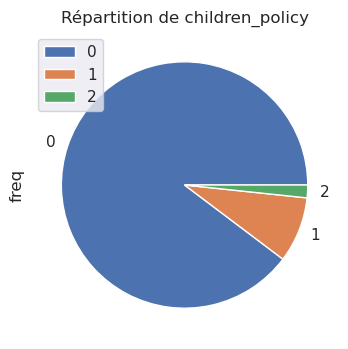

In [36]:
t = pd.crosstab(test_set["children_policy"], "freq")
t.plot.pie(subplots=True,figsize=(4,4))
plt.legend(loc="upper left")
plt.title("Répartition de children_policy")
plt.show()

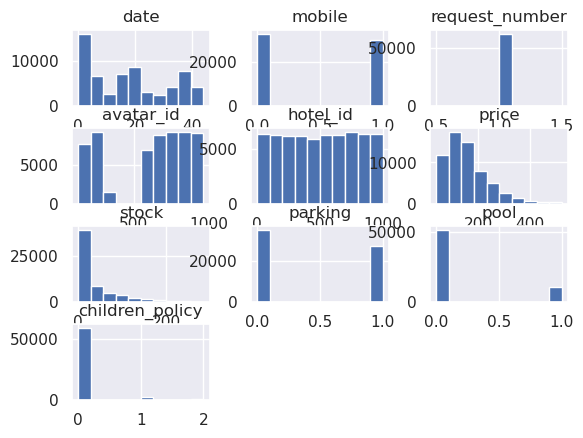

In [9]:
graph = data.hist()

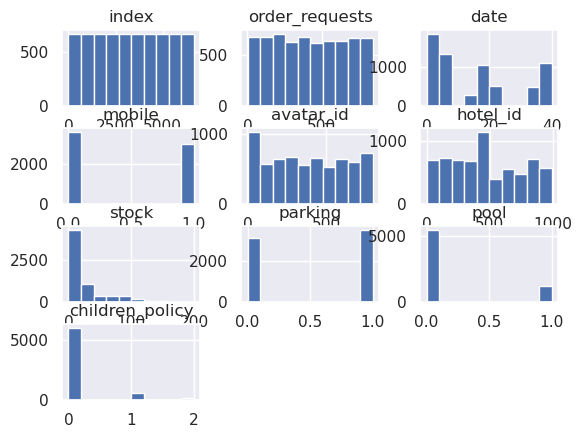

In [11]:
graph = test_set.hist()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[["city","date","language","mobile","request_number","hotel_id","stock","parking","pool","children_policy"]]
Y = data["price"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10,random_state=11)
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [49]:
#lasso avec paramètres par défaut
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Y_train)
prev=regLasso.predict(Xr_test)
#print("MSE=",mean_squared_error(Yquant_test,prev))
print("MAPE=",MAPE(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values